## 相关性分析

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('datas/los_data.csv')

## 相关性分析
[-1, +1]

In [10]:
train.corr()
corr=train.corr()['SalePrice'] # 和房价的相关性
corr[corr>0.5].sort_values()

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

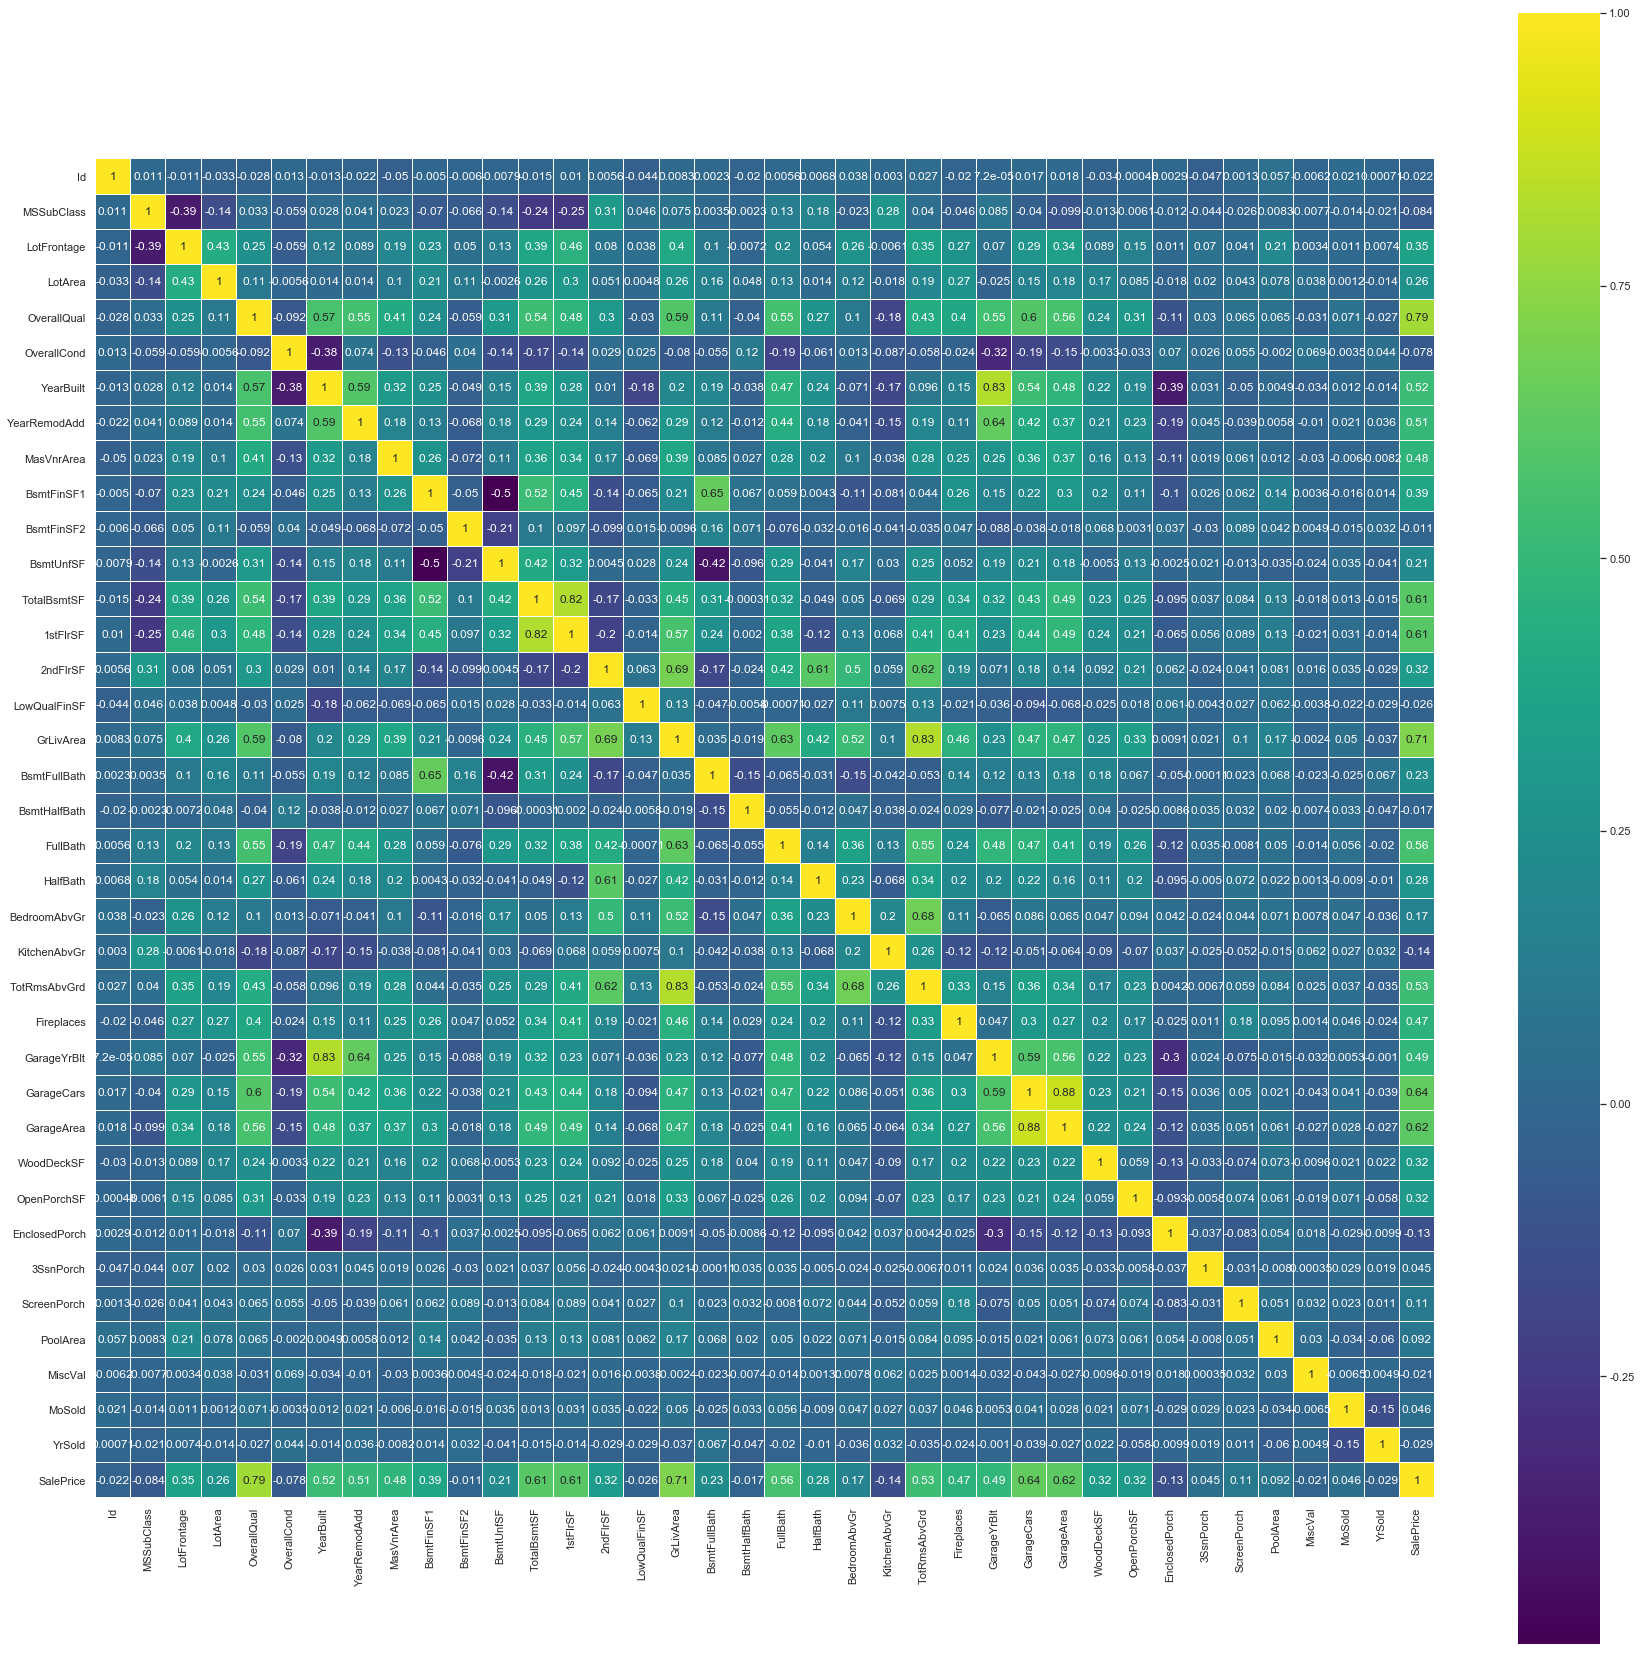

In [11]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),linewidths=0.01,square=True,cmap='viridis',annot=True)

## 特征观察
观察特征与目标值之间的的关系【使用统计图进行观察】

In [ ]:
train.corr()
corr=train.corr()['SalePrice']

### 装修材料对 售价的影响

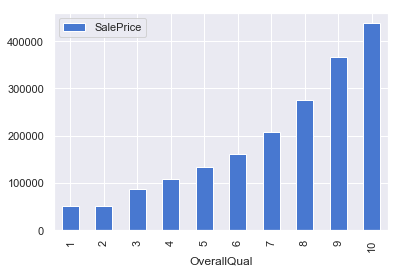

In [15]:
train[['OverallQual', 'SalePrice']].groupby(['OverallQual']).mean().plot.bar()

### 车库  售价 之间的关系

In [19]:
train[['GarageCars', 'SalePrice']].head()

,GarageCars,SalePrice
0,2,208500
1,2,181500
2,2,223500
3,3,140000
4,3,250000


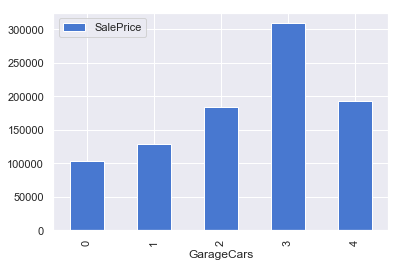

In [17]:
train[['GarageCars', 'SalePrice']].groupby(['GarageCars']).mean().plot.bar()

不要将连续的数据进行groupby，这样做没有意义

连续数据，分N类

如果想要对连续性的数据进行，就需要对数据进行分级

### 车数量 和 车库面积 的关系

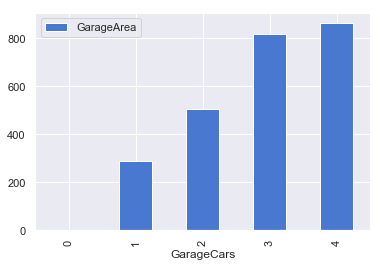

In [21]:
# 中位数
train[['GarageCars', 'GarageArea']].groupby(['GarageCars']).median().plot.bar()

In [22]:
np.corrcoef(train['GarageCars'], train['GarageArea']) # 相似度矩阵，相关系数，，皮尔森系数

array([[ 1.        ,  0.88247541],
       [ 0.88247541,  1.        ]])

### OverallQual 与 SalePrice 的相关性分析

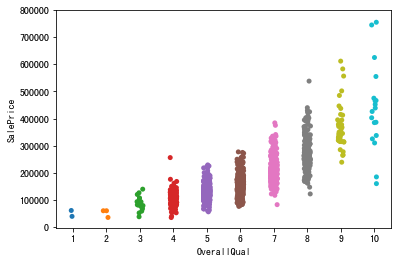

In [5]:
sns.stripplot('OverallQual', 'SalePrice', data=train)

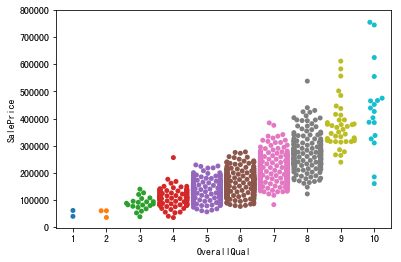

In [6]:
sns.swarmplot('OverallQual', 'SalePrice', data=train)

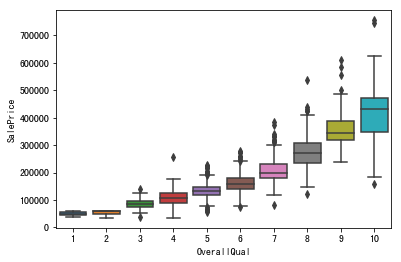

In [7]:
sns.boxplot('OverallQual', 'SalePrice', data=train)

In [11]:
train[['OverallQual', 'SalePrice']].head()

,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000


## HW：分析SalePrice 与 corr>0.5的变量的关系，以及corr<0的变量之间的关系
并说明分析理由

0~0.3  的列可以删掉（特征工程）

<br><br><br>

## seaborn 测试代码

In [12]:
%matplotlib inline

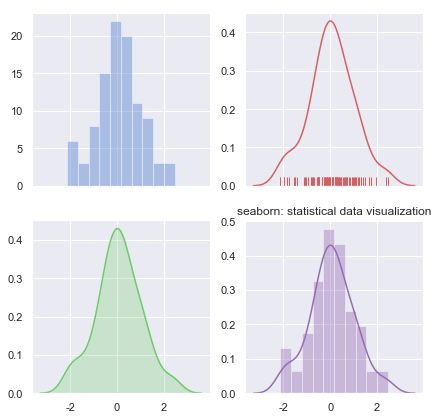

In [9]:
sns.set( palette="muted", color_codes=True)
rs = np.random.RandomState(10)
d = rs.normal(size=100)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

plt.title('seaborn: statistical data visualization')
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(d, color="m", ax=axes[1, 1])

plt.show()